In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


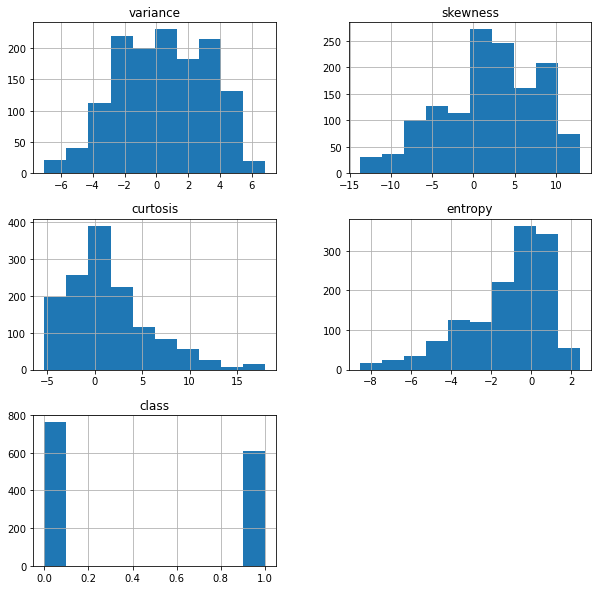

In [3]:
df.hist(figsize = (10, 10))
plt.show()

In [4]:
x = df.drop('class', 1)
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)

In [5]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [6]:
model_score = model.score(x_test, y_test)
model_score

0.9951456310679612

In [7]:
prediction = model.predict(x_test)

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title ='Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, prediction, labels = [1, 0]))

[[171   1]
 [  1 239]]


Confusion matrix, without normalization
[[171   1]
 [  1 239]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       0.99      0.99      0.99       172

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



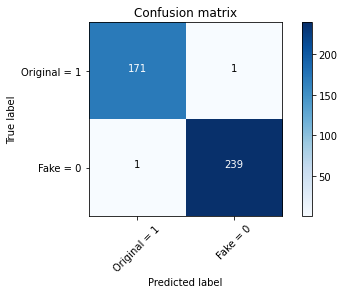

In [9]:
cnf_matrix = confusion_matrix(y_test, prediction, labels = [1, 0])
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Original = 1', 'Fake = 0'], normalize = False,  title ='Confusion matrix')
print(classification_report(y_test, prediction))

In [11]:
import pickle as pkl
pickle_out = open("model.pkl", "wb")
pkl.dump(model, pickle_out)
pickle_out.close()